customer segementation

In [ ]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

df = pd.read_csv('Mall_Customers.csv')

display(df.head())

Saving Mall_Customers.csv to Mall_Customers.csv
User uploaded file "Mall_Customers.csv" with length 3981 bytes


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<Axes: xlabel='count', ylabel='Gender'>

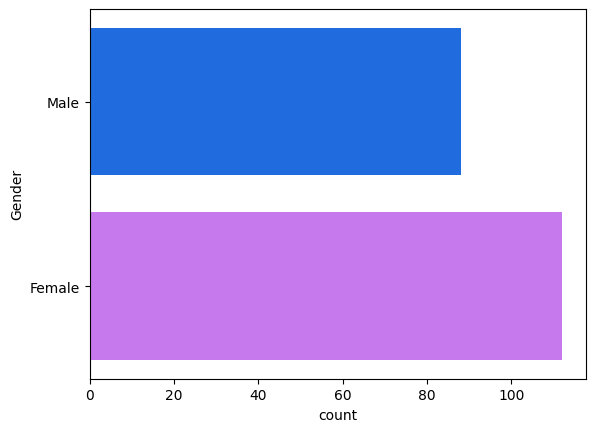

In [ ]:
sns.countplot(y = 'Gender' , data = df, hue='Gender', palette={'Female': '#cc66ff', 'Male': '#0066ff'})

Text(50, 13, 'Std. deviation score: 24.1')

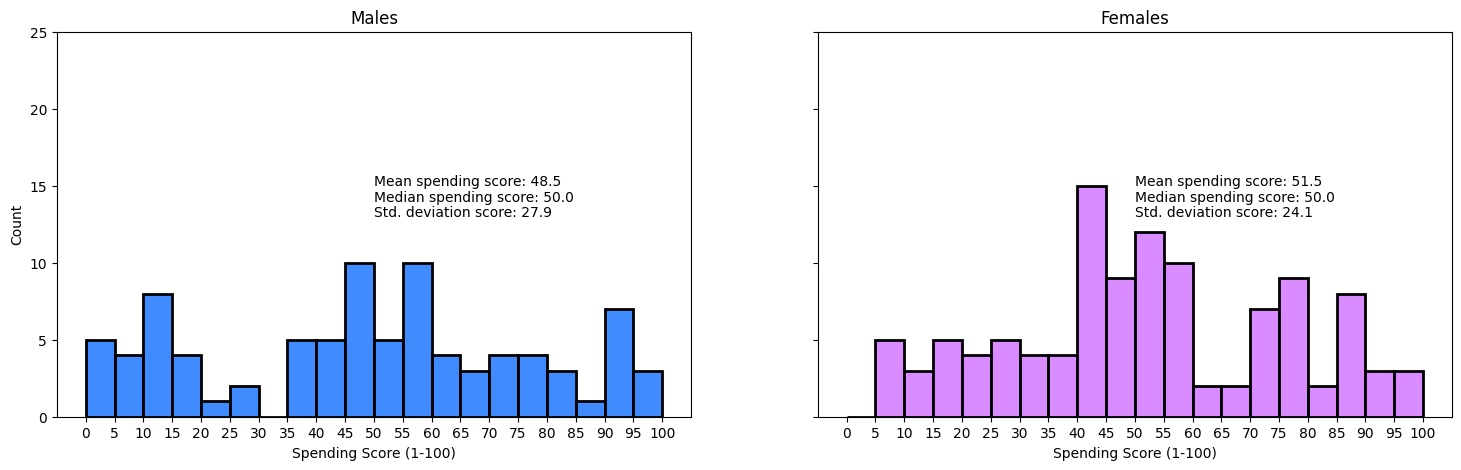

In [ ]:
#Who spends more?
male_spendings = df[df['Gender']=='Male']['Spending Score (1-100)'] # subset with males spending power
female_spendings = df[df['Gender']=='Female']['Spending Score (1-100)'] # subset with spending power

spending_bin = range(0,105,5)

# males histogram
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,5), sharey=True)
sns.histplot(male_spendings, bins=spending_bin, color='#0066ff', ax=ax1, edgecolor="k", linewidth=2)
ax1.set_xticks(spending_bin)
ax1.set_ylim(top=25)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(50,15, "Mean spending score: {:.1f}".format(male_spendings.mean()))
ax1.text(50,14, "Median spending score: {:.1f}".format(male_spendings.median()))
ax1.text(50,13, "Std. deviation score: {:.1f}".format(male_spendings.std()))

# females histogram
sns.histplot(female_spendings, bins=spending_bin, color='#cc66ff', ax=ax2, edgecolor="k", linewidth=2)
ax2.set_xticks(spending_bin)
ax2.set_ylim(top=25)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(50,15, "Mean spending score: {:.1f}".format(female_spendings.mean()))
ax2.text(50,14, "Median spending score: {:.1f}".format(female_spendings.median()))
ax2.text(50,13, "Std. deviation score: {:.1f}".format(female_spendings.std()))

In [ ]:
X1 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
s_scores = []
for n in range(2 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)
    silhouette_avg = silhouette_score(X1, algorithm.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

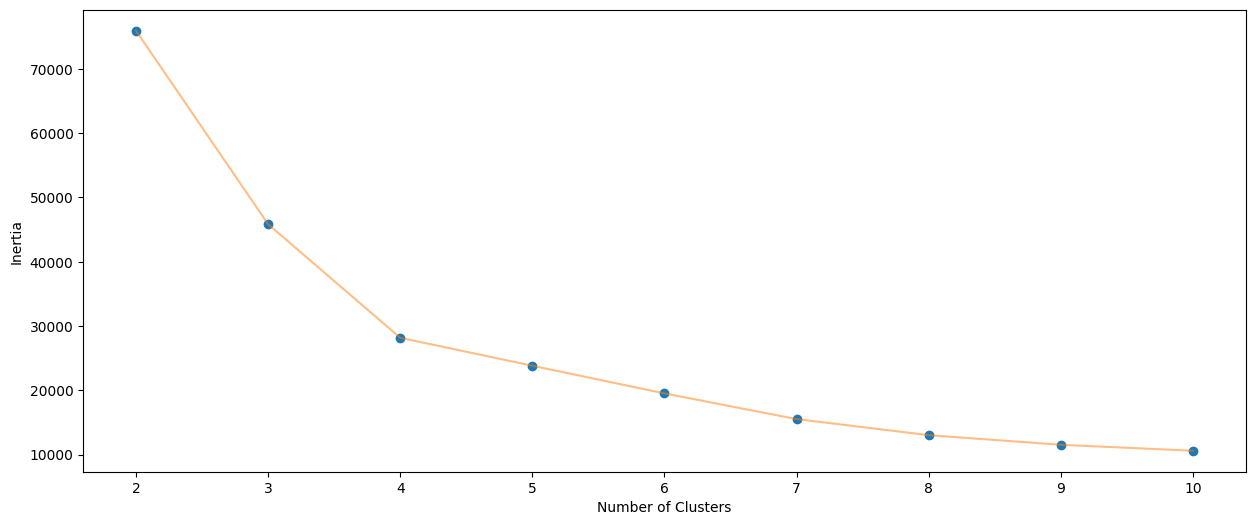

In [ ]:
#The Elbow Chart
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(2 , 11) , inertia , 'o')
plt.plot(np.arange(2 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

Selecting a number of clusters is the most challenging part of setting this algorithm. There are no hard mathematical criteria for this and many heuristic/simplified approaches have been developed. One of the simplest and the most popular one is the elbow method shown in this analysis. Additionaly a silhouette score will be used as well. There are also other, often advanced, options for choosing the optimal number of clusters (however, not used in this notebook and not implemented in sklearn).

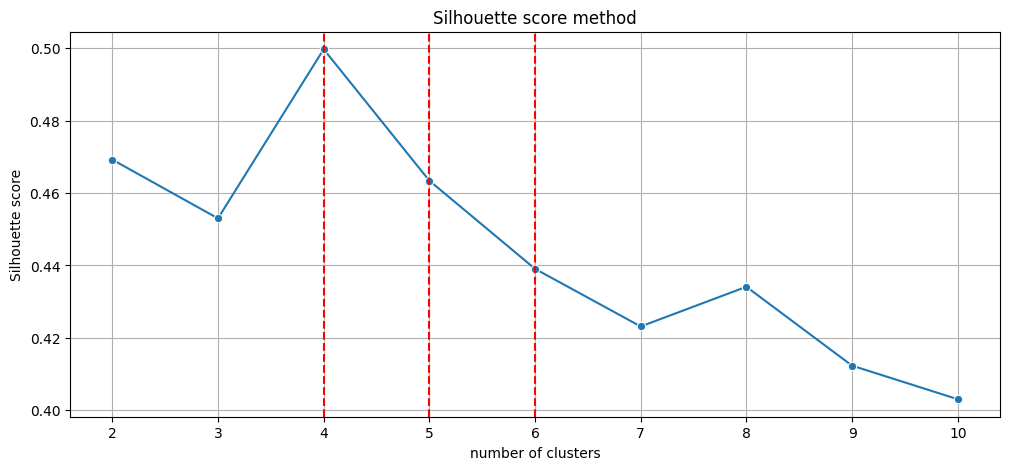

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(x=np.arange(2 , 11), y=s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(4, ls="--", c="red")
ax.axvline(5, ls="--", c="red")
ax.axvline(6, ls="--", c="red")
plt.grid()
plt.show()

Now we are unclear which clusters to go for 4 or 5 or 6. Here we use The Silhouette Method. The silhouette value measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation).The range of the Silhouette value is between +1 and -1. A high value is desirable and indicates that the point is placed in the correct cluster. If many points have a negative Silhouette value, it may indicate that we have created too many or too few clusters.

I mentioned before that a high Silhouette Score is desirable. The Silhouette Score reaches its global maximum at the optimal k. This should ideally appear as a peak in the Silhouette Value-versus-k plot.

In [ ]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [ ]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

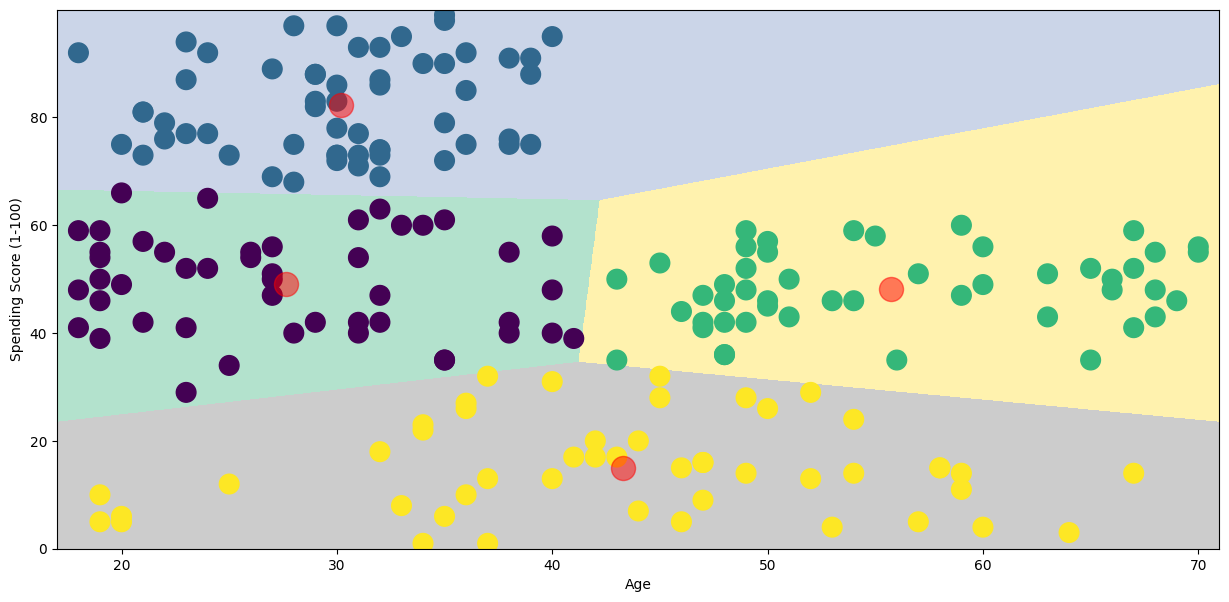

In [ ]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = df , c = labels1 ,
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

In [ ]:
X = df[['Age' ,'Annual Income (k$)' ,'Spending Score (1-100)']]
inertia = []
s_scores = []
for n in range(2 , 11):
    algorithm = KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan').fit(X)
    inertia.append(algorithm.inertia_)
    silhouette_avg = silhouette_score(X, algorithm.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

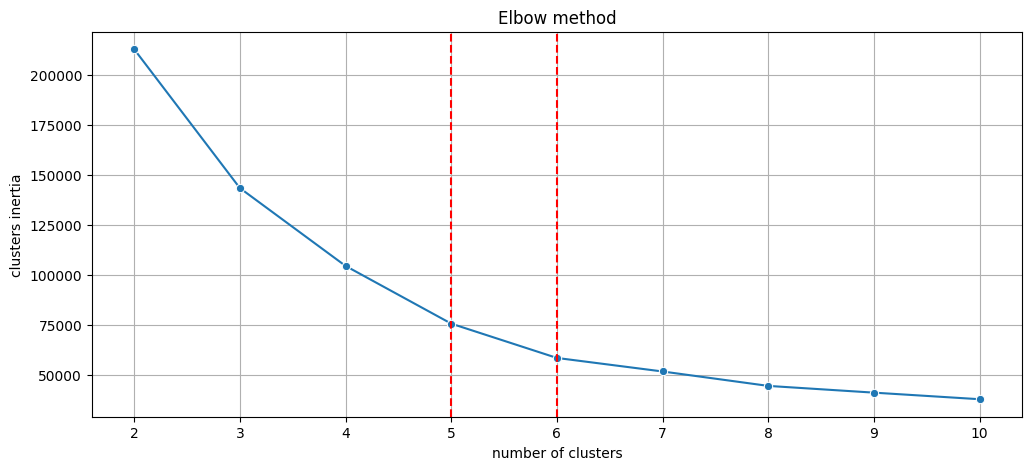

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(x=np.arange(2 , 11), y=inertia, marker='o', ax=ax)
ax.set_title("Elbow method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("clusters inertia")
ax.axvline(5, ls="--", c="red")
ax.axvline(6, ls="--", c="red")
plt.grid()
plt.show()

Now, going over a choice of 5 or 6 clusters is fair. Let's also see the silhouette score in analyzing the clusters of Annual Income and Age Groups of customers.

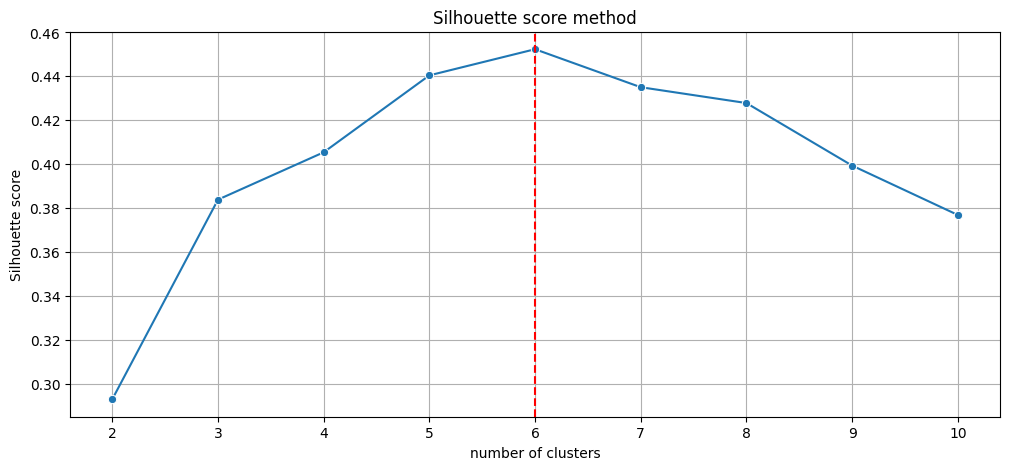

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(x=np.arange(2 , 11), y=s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(6, ls="--", c="red")
plt.grid()
plt.show()


Silhouette score method indicates the best options would be 6 clusters. Let's compare both.

In [ ]:
#For clusters of K=6
KM6 = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
KM6.fit(X)
labels6 = KM6.labels_
centroids6 = KM6.cluster_centers_
KM6_df = df.copy()
KM6_df['labels'] = labels6

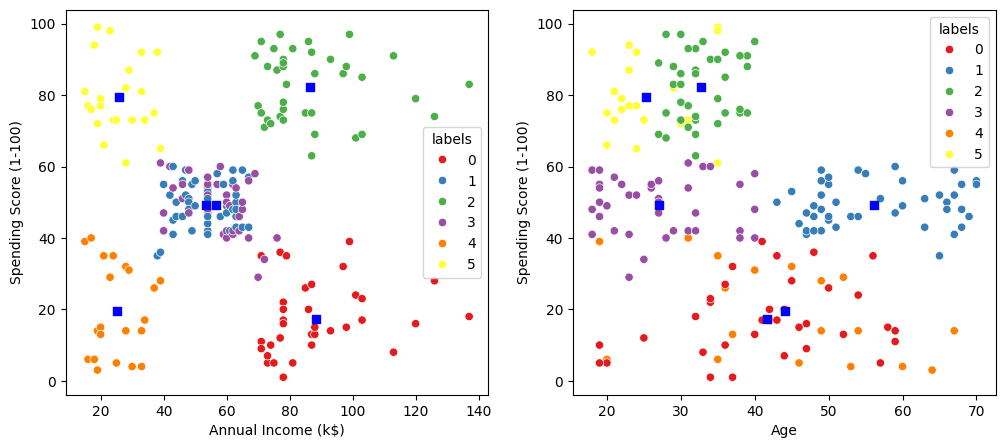

In [ ]:
fig1, (axes) = plt.subplots(1,2,figsize=(12,5))


scat_1 = sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=KM6_df,
                hue='labels', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot(x='Age', y='Spending Score (1-100)', data=KM6_df,
                hue='labels', palette='Set1', ax=axes[1], legend='full')

axes[0].scatter(centroids6[:,1],centroids6[:,2], marker='s', s=40, c="blue")
axes[1].scatter(centroids6[:,0],centroids6[:,2], marker='s', s=40, c="blue")
plt.show()

K-Means algorithm generated the following 6 clusters:

younger clients with medium annual and medium spending score
clients with high annual income and low spending score
younger clients with medium annual and medium spending score
clients with high annual income and high spending score
clients with low annual income and low spending score
clients with low annual income and high spending score
There are no distinct groups is terms of customers age.

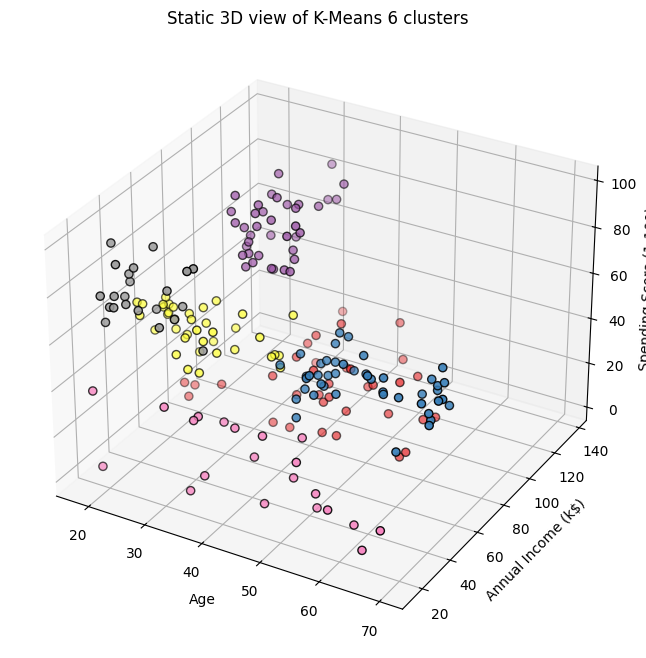

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(KM6_df['Age'],
           KM6_df['Annual Income (k$)'],
           KM6_df['Spending Score (1-100)'],
           c=KM6_df['labels'],
           s=35, edgecolor='k', cmap=plt.cm.Set1)

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('Static 3D view of K-Means 6 clusters')

plt.show()

Hierarchial Clustering
Hierarchical clustering, also known as hierarchical cluster analysis, is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other. This hierarchy of clusters is represented as a tree (or dendrogram).

The AgglomerativeClustering object performs a hierarchical clustering using a bottom up approach: each observation starts in its own cluster, and clusters are successively merged together


[115]
0s


In [ ]:
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

NameError: name 'sch' is not defined

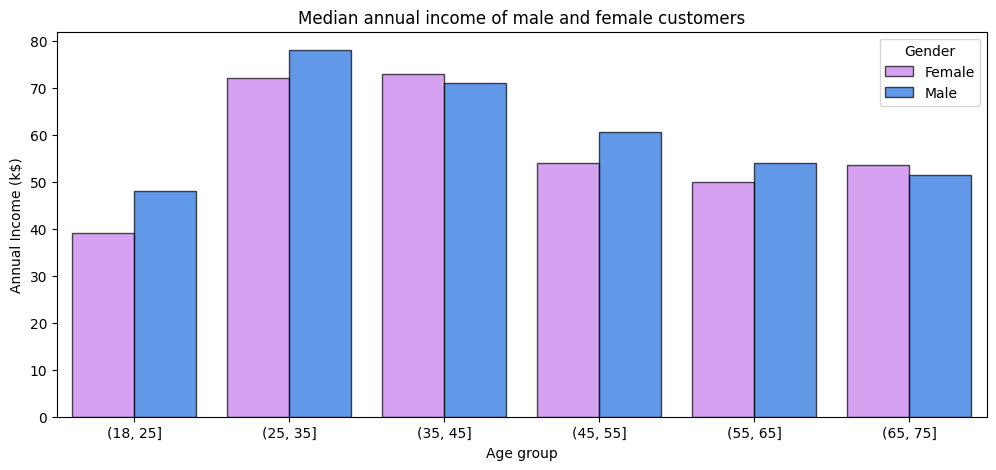

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x='Age_group', y='Annual Income (k$)', hue='Gender', data=medians_by_age_group,
            palette=['#cc66ff','#0066ff'],
            alpha=0.7,edgecolor='k',
            ax=ax)
ax.set_title('Median annual income of male and female customers')
ax.set_xlabel('Age group')
plt.show()

For Females the age groups of 35-45 earn the most and Female 35-40 age group overshadows the earnings of male.

In [ ]:
# Define age bins
age_bins = [18, 25, 35, 45, 55, 65, 75]

medians_by_age_group = df.groupby(["Gender",pd.cut(df['Age'], bins=age_bins)], observed=False).median()
medians_by_age_group.index = medians_by_age_group.index.set_names(['Gender', 'Age_group'])
medians_by_age_group.reset_index(inplace=True)

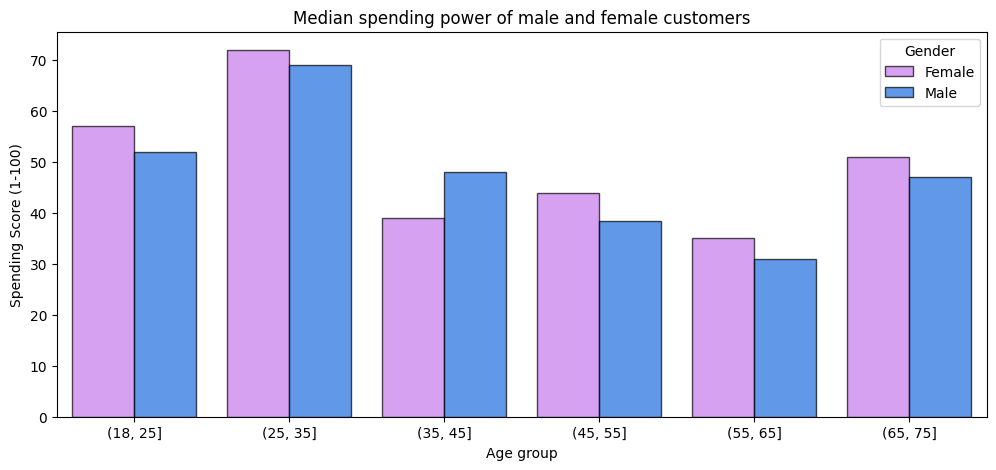

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x='Age_group', y='Spending Score (1-100)', hue='Gender', data=medians_by_age_group,
            palette=['#cc66ff','#0066ff'],
            alpha=0.7,edgecolor='k',
            ax=ax)
ax.set_title('Median spending power of male and female customers')
ax.set_xlabel('Age group')
plt.show()

Age group of male from 20-25 has the highest spending power and age group of females from 25-30 has the highest spending power